In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# 시각화
import matplotlib.pyplot as plt

from skimage.transform import resize
import pandas as pd
import matplotlib.pyplot as plt


## 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform
import matplotlib.pyplot as plt

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

import seaborn as sns


In [3]:
def plotSetting(pltStyle="seaborn-v0_8", setting_info =False ):
        '''
        # Fucntion Description : Plot 한글화 Setting
        # Date : 2024.06.05
        # Author : Forrest D Park 
        # update : 
         ◦ 2024.09.02 AM 11:02 by pdg : ploSetting() 함수 수정 
            - print 가 이쁘게 안나오는 문제 해결 ☑︎
        '''

        if setting_info:
            import warnings ;warnings.filterwarnings('ignore')
            import sys ;sys.path.append("../../../")
            import os 
            count =1
            for order,file in enumerate(os.listdir(os.getcwd())):
                if os.path.isdir(os.path.join(os.getcwd(),file)):
                    count +=1
            
            sys.path.append("../")
            sys.path.append("../../")
            
            
            
        # graph style seaborn
        import matplotlib.pyplot as plt # visiulization
        import platform
        from matplotlib import font_manager, rc # rc : 폰트 변경 모듈font_manager : 폰트 관리 모듈
        plt.style.use(pltStyle)
        plt.rcParams['axes.unicode_minus'] = False# unicode 설정
        if platform.system() == 'Darwin': rc('font', family='AppleGothic') # os가 macos
        elif platform.system() == 'Windows': # os가 windows
            path = 'c:/Windows/Fonts/malgun.ttf' 
            font_name = font_manager.FontProperties(fname=path).get_name()
            rc('font', family=font_name)
        else:
            print("Unknown System")
        # print(rainbow_green(f"✻✻✻✻______{imo*1} {Title} {imo*1}______✻✻✻✻",True))


In [4]:
## 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform
import matplotlib.pyplot as plt

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")
plotSetting()

In [5]:
df = pd.read_csv('./Data/df.csv', index_col=False)
서울경기부산 = pd.read_csv('./Data/서울경기부산.csv', index_col=False)

---
### 서울, 경기, 부산의 연소득 추정금액 평균

In [6]:
서울경기부산['도'].head()

0    경기도
1    경기도
2    경기도
3    경기도
4    경기도
Name: 도, dtype: object

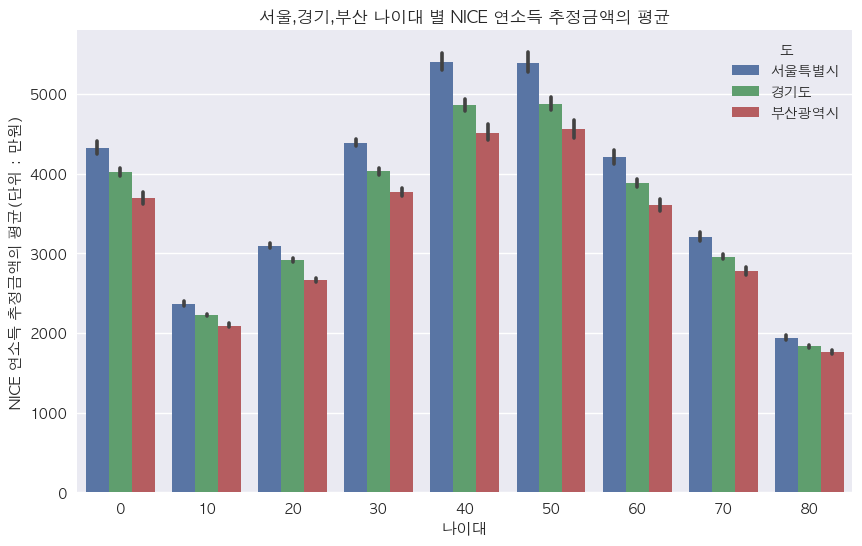

In [7]:
# 'region' 열을 '서울', '경기', '부산' 순으로 정렬
서울경기부산['도'] = pd.Categorical(서울경기부산['도'], categories=['서울특별시', '경기도', '부산광역시'], ordered=True)
서울경기부산 = 서울경기부산.sort_values('도')

plt.figure(figsize=(10, 6))
sns.barplot(x='AGE', y='AVG_INCOME', hue='도', data = 서울경기부산)


plt.title('서울,경기,부산 나이대 별 NICE 연소득 추정금액의 평균')
plt.xlabel('나이대')
plt.ylabel('NICE 연소득 추정금액의 평균(단위 : 만원)')
plt.show()

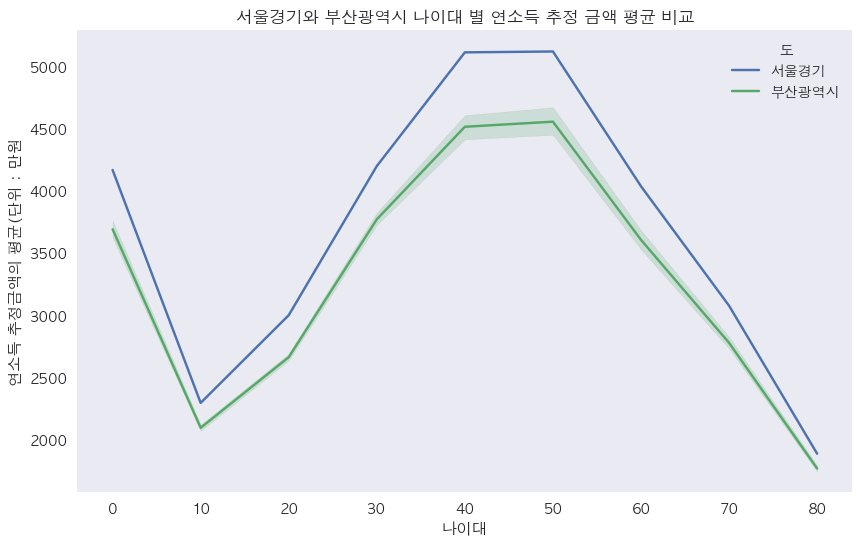

In [8]:
서울경기평균 = 서울경기부산[서울경기부산['도'].isin(['서울특별시','경기도'])].groupby('AGE', as_index=False)['AVG_INCOME'].mean()
서울경기평균['도'] = '서울경기'

부산데이터 = 서울경기부산[서울경기부산['도'] == '부산광역시']

combined = pd.concat([서울경기평균, 부산데이터[['AGE', 'AVG_INCOME', '도']]], ignore_index=True)

combined['도'] = pd.Categorical(combined['도'], categories=['서울경기', '부산광역시'], ordered=True)
combined = combined.sort_values('도')

plt.figure(figsize=(10, 6))
sns.lineplot(x='AGE', y = 'AVG_INCOME', hue ='도', data=combined, markers='o')

plt.title('서울경기와 부산광역시 나이대 별 연소득 추정 금액 평균 비교')
plt.xlabel('나이대')
plt.ylabel('연소득 추정금액의 평균(단위 : 만원')
plt.grid()
plt.show()

In [9]:
df지역 = df[df['META_ADD'] != '전국']

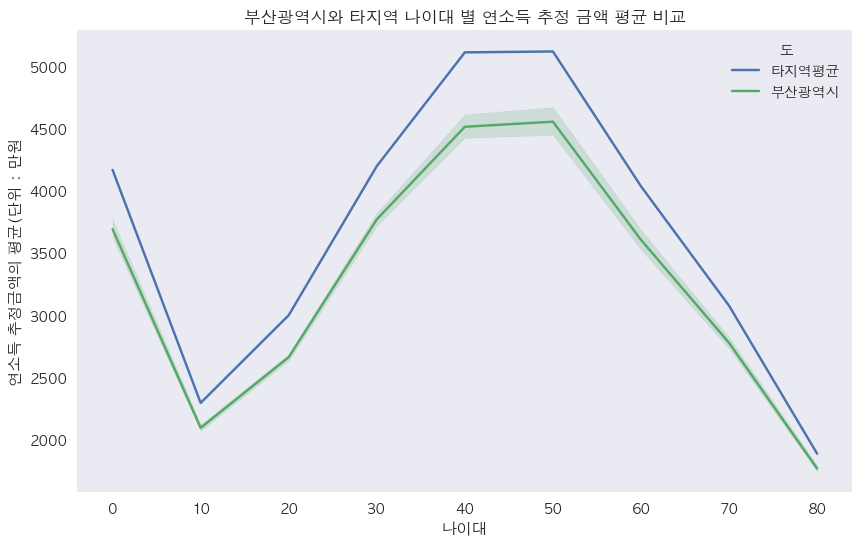

In [10]:

타지역평균 = 서울경기부산[서울경기부산['도'] != '부산광역시'].groupby('AGE', as_index=False)['AVG_INCOME'].mean()
타지역평균['도'] = '타지역평균'
부산데이터 = 서울경기부산[서울경기부산['도'] == '부산광역시']

combined = pd.concat([타지역평균, 부산데이터[['AGE', 'AVG_INCOME', '도']]], ignore_index=True)

combined['도'] = pd.Categorical(combined['도'], categories=['타지역평균', '부산광역시'], ordered=True)
combined = combined.sort_values('도')

plt.figure(figsize=(10, 6))
sns.lineplot(x='AGE', y = 'AVG_INCOME', hue ='도', data=combined, markers='o')

plt.title('부산광역시와 타지역 나이대 별 연소득 추정 금액 평균 비교')
plt.xlabel('나이대')
plt.ylabel('연소득 추정금액의 평균(단위 : 만원')
plt.grid()
plt.show()

----
서울, 경기, 부산 20대 연소득 구간

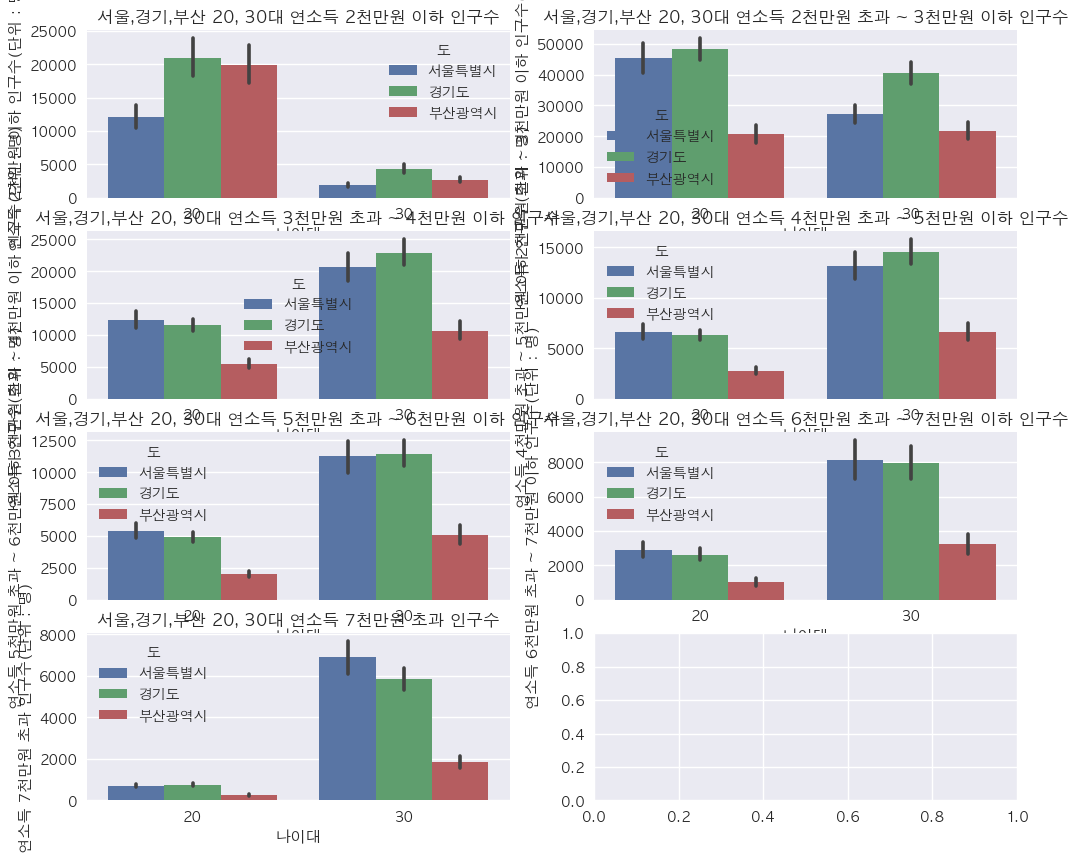

In [11]:
ICM = ['ICM_1_CNT','ICM_2_CNT','ICM_3_CNT','ICM_4_CNT','ICM_5_CNT','ICM_6_CNT','ICM_7_CNT']
ICM_NAME =[
    '연소득 2천만원 이하 인구수',
    '연소득 2천만원 초과 ~ 3천만원 이하 인구수',
    '연소득 3천만원 초과 ~ 4천만원 이하 인구수',
    '연소득 4천만원 초과 ~ 5천만원 이하 인구수',
    '연소득 5천만원 초과 ~ 6천만원 이하 인구수',
    '연소득 6천만원 초과 ~ 7천만원 이하 인구수',
    '연소득 7천만원 초과 인구수'
] 

fig, axes = plt.subplots(4, 2, figsize=(12, 10))

for ax, icm, name in zip(axes.flatten(), ICM, ICM_NAME) : 
    sns.barplot(x='AGE', y=icm, hue='도', data = 서울경기부산[(서울경기부산['AGE'] == 20) | (서울경기부산['AGE'] == 30) ], ax=ax)
    ax.set_title(f'서울,경기,부산 20, 30대 {name}')
    ax.set_ylabel(f'{name}(단위 : 명)')
    ax.set_xlabel('나이대')
plt.show()

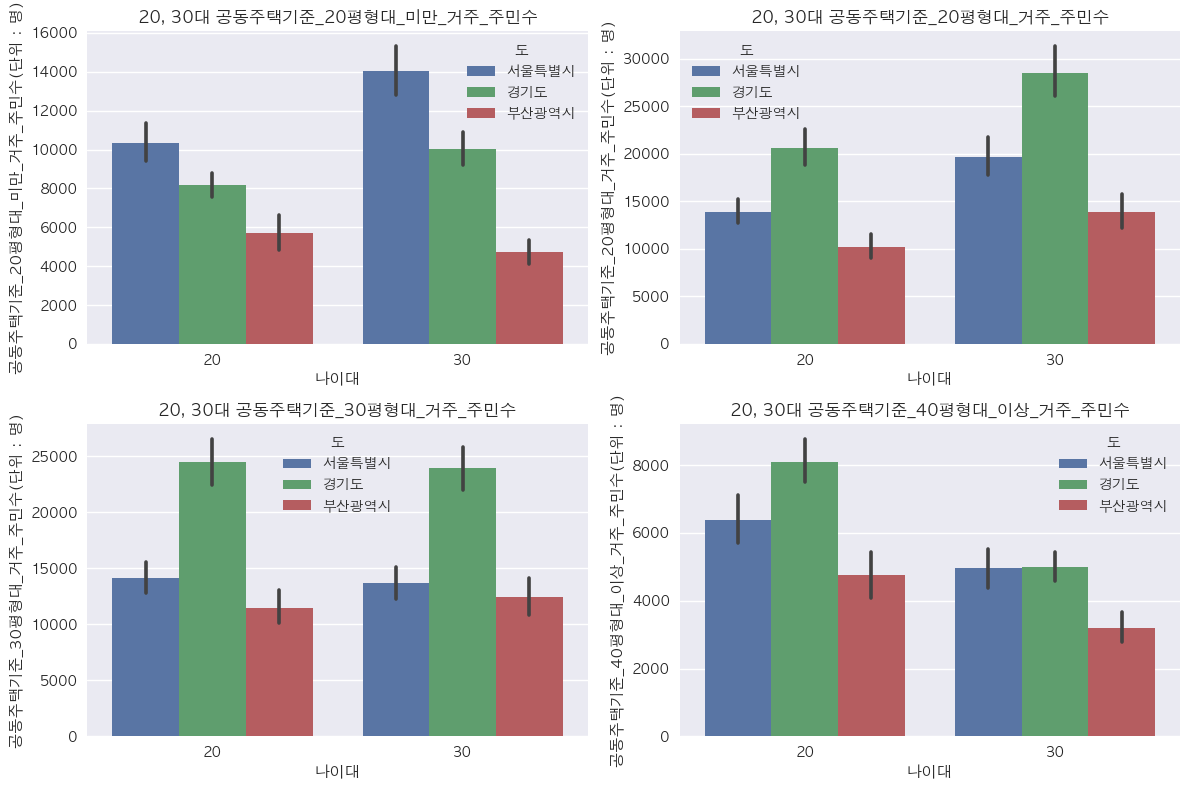

In [12]:
PYN = ['PYN_U20_CNT','PYN_O20_CNT','PYN_O30_CNT','PYN_O40_CNT']
PYN_NAME = [
    '공동주택기준_20평형대_미만_거주_주민수','공동주택기준_20평형대_거주_주민수','공동주택기준_30평형대_거주_주민수','공동주택기준_40평형대_이상_거주_주민수'
]
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for ax, pyn, name in zip(axes.flatten(), PYN, PYN_NAME) : 
    sns.barplot(x='AGE', y=pyn, hue='도', data = 서울경기부산[(서울경기부산['AGE'] == 20) | (서울경기부산['AGE'] == 30) ], ax=ax)
    ax.set_title(f'20, 30대 {name}')
    ax.set_ylabel(f'{name}(단위 : 명)')
    ax.set_xlabel('나이대')

plt.tight_layout()
plt.show()

In [13]:
인구동태 = pd.read_csv('./Data/부산광역시_인구동태 현황_20221231.csv', encoding='euc-kr')
해운대2 = 인구동태[인구동태['행정구역별'] == '해운대구']

In [14]:
해운대빈집 = pd.read_csv('./Data/부산광역시 해운대구_빈집정비계획대상_20220622.csv', encoding='euc-kr')
해운대빈집

,소재지,도로명,주택유형,건축년도,건축구조,전용면적,건축면적,연면적,대지면적
0,부산광역시 해운대구 중동 1500-9,달맞이길117번가길 97,아파트,1991,철근콘크리트구조,234.51,529.02,3147.84,726.9
1,부산광역시 해운대구 중동 1499-16,달맞이길117번나길 15-17,다세대,1992,철근콘크리트구조,27.00,150.67,634.80,318.4
2,부산광역시 해운대구 중동 1499-4,달맞이길117번나길 15-19,다세대,1992,철근콘크리트구조,27.00,150.67,634.80,318.3
3,부산광역시 해운대구 중동 1493-21,달맞이길117번다길 130-1,단독주택,1985,벽돌구조,NaN,96.87,157.90,0.0
4,부산광역시 해운대구 중동 1506-8,달맞이길117번다길 17,아파트,1991,철근콘크리트구조,141.60,564.46,3454.93,233.9
...,...,...,...,...,...,...,...,...,...
475,부산광역시 해운대구 반송동 6-141,윗반송로51번길 223-18,단독주택,1980,블록구조,NaN,24.86,49.72,37.0
476,부산광역시 해운대구 반송동 6-146,윗반송로51번길 223-28,단독주택,1978,블록구조,NaN,21.00,21.00,37.0
477,부산광역시 해운대구 반송동 7-7,윗반송로51번길 248-6,단독주택,1971,블록구조,NaN,33.77,33.77,29.0
478,부산광역시 해운대구 반송동 566,운봉길186번길 28-4,단독주택,1941,일반목구조,NaN,39.67,39.67,215.0


In [15]:
해운대빈집['동'] = 해운대빈집['소재지'].str.extract(r'(\w+동)')
해운대빈집

,소재지,도로명,주택유형,건축년도,건축구조,전용면적,건축면적,연면적,대지면적,동
0,부산광역시 해운대구 중동 1500-9,달맞이길117번가길 97,아파트,1991,철근콘크리트구조,234.51,529.02,3147.84,726.9,중동
1,부산광역시 해운대구 중동 1499-16,달맞이길117번나길 15-17,다세대,1992,철근콘크리트구조,27.00,150.67,634.80,318.4,중동
2,부산광역시 해운대구 중동 1499-4,달맞이길117번나길 15-19,다세대,1992,철근콘크리트구조,27.00,150.67,634.80,318.3,중동
3,부산광역시 해운대구 중동 1493-21,달맞이길117번다길 130-1,단독주택,1985,벽돌구조,NaN,96.87,157.90,0.0,중동
4,부산광역시 해운대구 중동 1506-8,달맞이길117번다길 17,아파트,1991,철근콘크리트구조,141.60,564.46,3454.93,233.9,중동
...,...,...,...,...,...,...,...,...,...,...
475,부산광역시 해운대구 반송동 6-141,윗반송로51번길 223-18,단독주택,1980,블록구조,NaN,24.86,49.72,37.0,반송동
476,부산광역시 해운대구 반송동 6-146,윗반송로51번길 223-28,단독주택,1978,블록구조,NaN,21.00,21.00,37.0,반송동
477,부산광역시 해운대구 반송동 7-7,윗반송로51번길 248-6,단독주택,1971,블록구조,NaN,33.77,33.77,29.0,반송동
478,부산광역시 해운대구 반송동 566,운봉길186번길 28-4,단독주택,1941,일반목구조,NaN,39.67,39.67,215.0,반송동


In [16]:
동별_주택유형_개수 = 해운대빈집.groupby(['동', '주택유형']).size().reset_index(name='갯수')
동별_주택유형_개수

,동,주택유형,갯수
0,반송동,다가구주택,22
1,반송동,다세대,16
2,반송동,단독주택,156
3,반송동,아파트,6
4,반여동,다가구주택,3
5,반여동,다세대,56
6,반여동,단독주택,20
7,반여동,아파트,1
8,석대동,단독주택,2
9,송정동,다가구주택,1


<Figure size 1200x800 with 0 Axes>

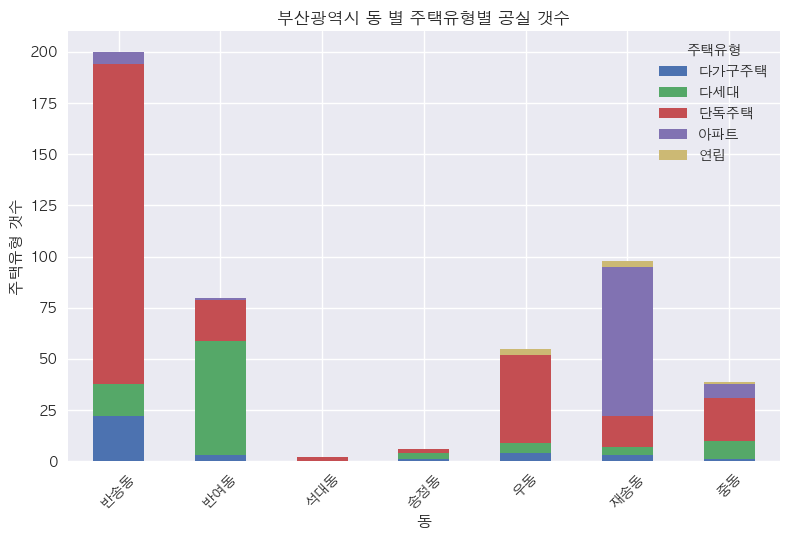

In [17]:
# '동'과 '주택유형'을 기준으로 데이터 집계
동별_주택유형_갯수 = 해운대빈집.groupby(['동', '주택유형']).size().unstack(fill_value=0)

# 막대그래프 그리기
plt.figure(figsize=(12, 8))
동별_주택유형_갯수.plot(kind='bar', stacked=True)
plt.title('부산광역시 동 별 주택유형별 공실 갯수')
plt.xlabel('동')
plt.ylabel('주택유형 갯수')
plt.xticks(rotation=45)
plt.legend(title='주택유형')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

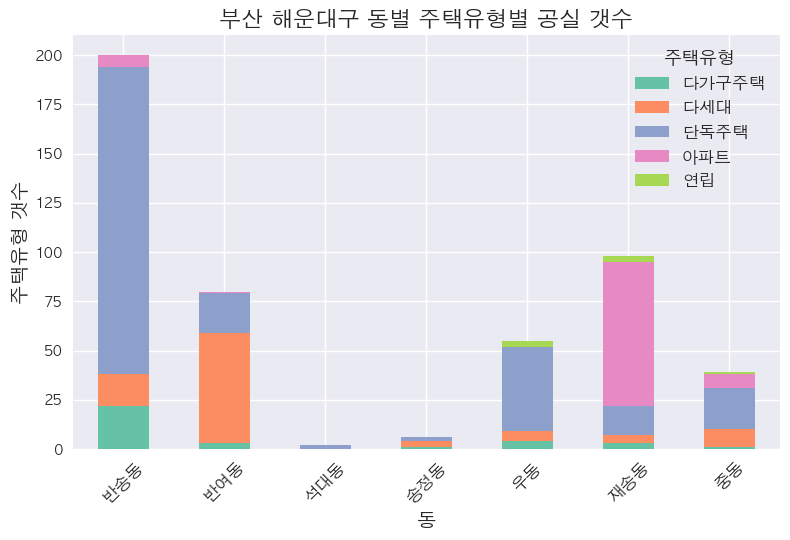

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# '동'과 '주택유형'을 기준으로 데이터 집계
동별_주택유형_갯수 = 해운대빈집.groupby(['동', '주택유형']).size().unstack(fill_value=0)

# 색상 팔레트 설정
color_palette = sns.color_palette("Set2", n_colors=len(동별_주택유형_갯수.columns))

# 막대그래프 그리기
plt.figure(figsize=(12, 8))
동별_주택유형_갯수.plot(kind='bar', stacked=True, color=color_palette)

# 그래프 제목 및 레이블 설정
plt.title('부산 해운대구 동별 주택유형별 공실 갯수', fontsize=16, fontweight='bold')
plt.xlabel('동', fontsize=14)
plt.ylabel('주택유형 갯수', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='주택유형', fontsize=12, title_fontsize='13')
plt.tight_layout()

# 그래프 보여주기
plt.show()


In [19]:
나이스_해운대구 = df[df['시'] == '해운대구']
나이스_해운대구_여성 = 나이스_해운대구[나이스_해운대구['GENDER'] == 2]
나이스_해운대구_여성_2030 = 나이스_해운대구_여성[(나이스_해운대구_여성['AGE'] == 20) | (나이스_해운대구_여성['AGE'] == 30)]
나이스_해운대구_여성_2030

,B_DATE,META_ADD,GENDER,AGE,AVG_INCOME,MED_INCOME,AVG_INCOMEX,IN_DIST_RO,IN_SH,IN_MAX,...,AVG_CRED_1,AVG_CHECK_1,AVG_ABRO_1,COUNT_CRED_1,COUNT_CHECK_1,COUNT_ABRO_1,AVG_AMT_FPAY_M3,COUNT_AMT_FPAY_M3,도,시
1154,202203,부산광역시해운대구,2,20,2815,2400,2614,298.2,8.0,3000,...,1123,559,236.0,20851,18946,790,2892,21305,부산광역시,해운대구
1155,202203,부산광역시해운대구,2,30,3927,3300,3208,416.0,11.9,4700,...,2281,577,346.0,21320,14982,1789,5517,21744,부산광역시,해운대구
3287,202206,부산광역시해운대구,2,20,2831,2400,2633,305.8,8.0,3000,...,1363,667,369.0,20490,18803,899,3125,20800,부산광역시,해운대구
3288,202206,부산광역시해운대구,2,30,3946,3300,3237,426.2,11.9,4700,...,2770,710,459.0,21161,15602,1863,6045,21402,부산광역시,해운대구
5420,202209,부산광역시해운대구,2,20,2868,2400,2668,312.6,8.0,3100,...,1362,683,347.0,19991,18397,966,3268,20322,부산광역시,해운대구
5421,202209,부산광역시해운대구,2,30,3975,3400,3274,433.2,12.0,4800,...,2754,683,472.0,21051,15714,2035,6263,21347,부산광역시,해운대구
7553,202212,부산광역시해운대구,2,20,2906,2400,2713,314.8,8.0,3100,...,1327,647,329.0,19477,17797,960,3260,19863,부산광역시,해운대구
7554,202212,부산광역시해운대구,2,30,4008,3400,3333,434.1,12.0,4900,...,2740,675,459.0,20730,15192,2119,6224,21076,부산광역시,해운대구
9686,202303,부산광역시해운대구,2,20,2958,2400,2747,318.0,7.9,3100,...,1242,615,344.0,19016,17368,935,3202,19412,부산광역시,해운대구
9687,202303,부산광역시해운대구,2,30,4110,3400,3394,441.8,12.0,5000,...,2537,633,474.0,20271,14739,1892,6110,20659,부산광역시,해운대구


In [20]:
나이스_부산 = df[(df['시'] != '해운대구') & (df['도'] == '부산광역시')]
나이스_부산_구_여성 = 나이스_부산[나이스_부산['GENDER'] == 2]
나이스_부산_구_여성_2030 = 나이스_부산_구_여성[(나이스_부산_구_여성['AGE'] == 20) | (나이스_부산_구_여성['AGE'] == 30)]
나이스_부산_구_여성_2030

,B_DATE,META_ADD,GENDER,AGE,AVG_INCOME,MED_INCOME,AVG_INCOMEX,IN_DIST_RO,IN_SH,IN_MAX,...,AVG_CRED_1,AVG_CHECK_1,AVG_ABRO_1,COUNT_CRED_1,COUNT_CHECK_1,COUNT_ABRO_1,AVG_AMT_FPAY_M3,COUNT_AMT_FPAY_M3,도,시
1046,202203,부산광역시동부,2,20,2574,2200,2395,272.6,7.3,2700,...,1067,545,212.0,72056,65932,2509,2761,73626,부산광역시,동부
1047,202203,부산광역시동부,2,30,3583,3000,2987,379.5,10.0,3800,...,1930,544,277.0,69046,50460,4399,4772,70323,부산광역시,동부
1073,202203,부산광역시부산진구,2,20,2579,2100,2356,273.2,7.3,2700,...,1194,564,207.0,24171,21729,907,3079,24572,부산광역시,부산진구
1074,202203,부산광역시부산진구,2,30,3423,2900,2862,362.6,10.0,3800,...,1828,535,266.0,21568,15882,1203,4528,21986,부산광역시,부산진구
1100,202203,부산광역시사하구,2,20,2525,2100,2356,267.5,7.3,2700,...,1061,548,214.0,16191,14968,484,2754,16460,부산광역시,사하구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16005,202312,부산광역시부산진구,2,30,3726,3200,3095,395.7,10.1,4300,...,2346,643,356.0,23229,17971,2217,5442,23501,부산광역시,부산진구
16031,202312,부산광역시사하구,2,20,2746,2200,2571,291.6,7.1,2900,...,1265,630,267.0,14620,13622,677,3143,14841,부산광역시,사하구
16032,202312,부산광역시사하구,2,30,3598,3000,3062,382.1,8.8,3600,...,2149,632,336.0,14857,11860,1217,5064,15080,부산광역시,사하구
16058,202312,부산광역시서부,2,20,2756,2200,2561,292.7,7.1,2900,...,1294,624,304.0,47711,44248,2546,3195,48480,부산광역시,서부


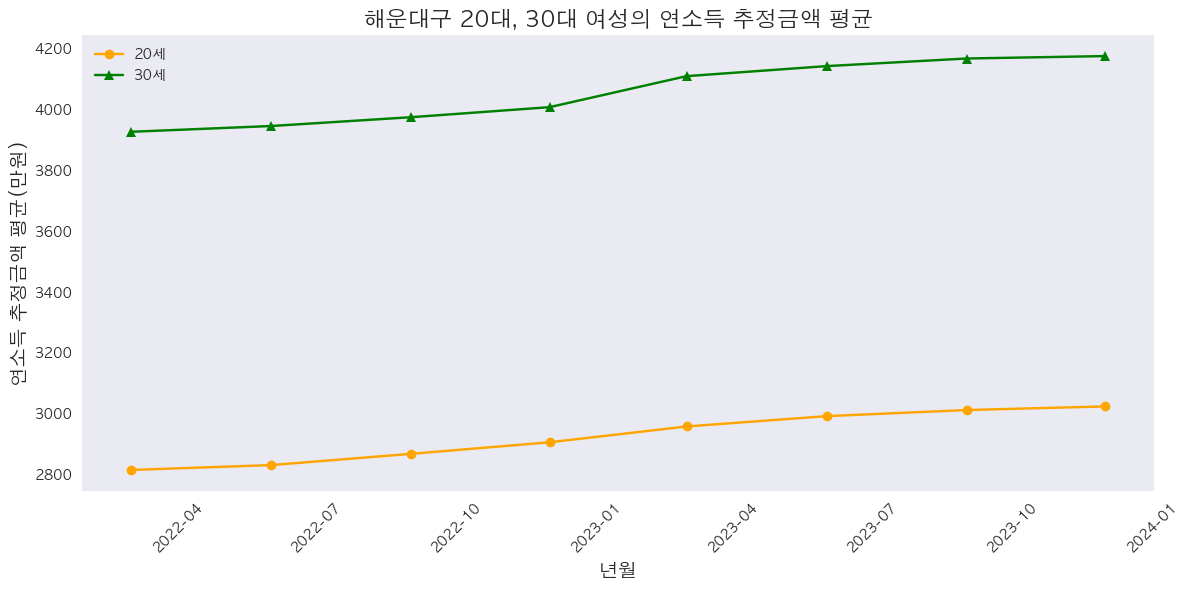

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# B_DATE를 datetime 형식으로 변환
나이스_해운대구_여성_2030['DATE'] = pd.to_datetime(나이스_해운대구_여성_2030['B_DATE'], format='%Y%m')

# 20대 및 30대 데이터 필터링
나이스_해운대구_여성_20 = 나이스_해운대구_여성_2030[나이스_해운대구_여성_2030['AGE'] == 20]
나이스_해운대구_여성_30 = 나이스_해운대구_여성_2030[나이스_해운대구_여성_2030['AGE'] == 30]

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(나이스_해운대구_여성_20['DATE'], 나이스_해운대구_여성_20['AVG_INCOME'], color='orange', marker='o', label='20세')
plt.plot(나이스_해운대구_여성_30['DATE'], 나이스_해운대구_여성_30['AVG_INCOME'], color='green', marker='^', label='30세')

plt.title('해운대구 20대, 30대 여성의 연소득 추정금액 평균', fontsize=16)
plt.xlabel('년월', fontsize=14)
plt.ylabel('연소득 추정금액 평균(만원)', fontsize=14)

plt.xticks(rotation=45)
plt.legend()
plt.grid()  # 그리드 추가
plt.tight_layout()  # 레이아웃 조정
plt.show()


In [22]:
해운대인구_2024 = pd.read_csv('./Data/부산광역시 해운대구_인구현황_20240430.csv', encoding='euc-kr')
해운대인구_2020 = pd.read_csv('./Data/부산광역시_해운대구_인구현황_20200531.csv', encoding='euc-kr')
해운대인구_2018 = pd.read_csv('./Data/부산광역시_해운대구_인구현황_20181130.csv', encoding='euc-kr')
years = [2024, 2020, 2018]
dfs_여 = [해운대인구_2024, 해운대인구_2020, 해운대인구_2018]
dfs_남 = [해운대인구_2024, 해운대인구_2020, 해운대인구_2018]

In [23]:

해운대인구['동'] = 해운대인구['동명'].str.replace(r'\d+', '', regex=True)
해운대인구_여 = 해운대인구[해운대인구['성별구분'] == '여']
해운대인구_여_20 =해운대인구_여[(해운대인구_여['연령'] == '20세 - 29세')]
해운대인구_여_30 =해운대인구_여[(해운대인구_여['연령'] == '30세 - 39세')]
여_20 = pd.DataFrame({
    '동' : 해운대인구_여_20['동'],
    '연령' : 해운대인구_여_20['연령'], 
    '인구수' : 해운대인구_여_20['인구수']})

여_30 = pd.DataFrame({
    '동' : 해운대인구_여_30['동'],
    '연령' : 해운대인구_여_30['연령'], 
    '인구수' : 해운대인구_여_30['인구수']})

여_20_합 = 여_20.groupby('동')['인구수'].sum().reset_index()
여_30_합 = 여_30.groupby('동')['인구수'].sum().reset_index()

여_20_합['년도'] = '2024'
여_20_합['연령'] = '20대'
여_20_합['성별'] = '여자'

여_30_합['년도'] = '2024'
여_30_합['연령'] = '30대'
여_30_합['성별'] = '여자'
여_30_합

NameError: name '해운대인구' is not defined

In [24]:
해운대인구_남 = 해운대인구[해운대인구['성별구분'] == '남']
해운대인구_남_20 =해운대인구_남[(해운대인구_남['연령'] == '20세 - 29세')]
해운대인구_남_30 =해운대인구_남[(해운대인구_남['연령'] == '30세 - 39세')]
남_20 = pd.DataFrame({
    '동' : 해운대인구_남_20['동'],
    '연령' : 해운대인구_남_20['연령'], 
    '인구수' : 해운대인구_남_20['인구수']})

남_30 = pd.DataFrame({
    '동' : 해운대인구_남_30['동'],
    '연령' : 해운대인구_남_30['연령'], 
    '인구수' : 해운대인구_남_30['인구수']})

남_20_합 = 남_20.groupby('동')['인구수'].sum().reset_index()
남_30_합 = 남_30.groupby('동')['인구수'].sum().reset_index()
남_30_합

남_20_합['년도'] = '2024'
남_20_합['연령'] = '20대'
남_20_합['성별'] = '남자'

남_30_합['년도'] = '2024'
남_30_합['연령'] = '30대'
남_30_합['성별'] = '남자'
남_30_합

NameError: name '해운대인구' is not defined

In [25]:
df_dict = {}

for year, 해운대인구 in zip(years, dfs_여):
    # 동명에서 숫자를 제거한 후 불리언 마스크를 적용
    해운대인구['동'] = 해운대인구['동명'].str.replace(r'\d+', '', regex=True)
    
    해운대인구_여_20 = 해운대인구[(해운대인구['성별구분'] == '여') & (해운대인구['연령'] == '20세 - 29세')]
    해운대인구_여_30 = 해운대인구[(해운대인구['성별구분'] == '여') & (해운대인구['연령'] == '30세 - 39세')]
    
    여_20 = pd.DataFrame({
        '동': 해운대인구_여_20['동'],
        '연령': 해운대인구_여_20['연령'],
        '인구수': 해운대인구_여_20['인구수']
    })

    여_30 = pd.DataFrame({
        '동': 해운대인구_여_30['동'],
        '연령': 해운대인구_여_30['연령'],
        '인구수': 해운대인구_여_30['인구수']
    })

    여_20_합 = 여_20.groupby('동')['인구수'].sum().reset_index()
    여_30_합 = 여_30.groupby('동')['인구수'].sum().reset_index()

    여_20_합['년도'] = year
    여_20_합['연령'] = '20대'
    여_20_합['성별'] = '여자'

    여_30_합['년도'] = year
    여_30_합['연령'] = '30대'
    여_30_합['성별'] = '여자'

    # 연도별로 데이터를 딕셔너리에 저장
    df_dict[f"df{year}_여자_20대"] = 여_20_합
    df_dict[f"df{year}_여자_30대"] = 여_30_합

# 결과 확인
print(df_dict)


{'df2024_여자_20대':       동   인구수    년도   연령  성별
0  반송제동  1258  2024  20대  여자
1  반여제동  3166  2024  20대  여자
2   송정동   376  2024  20대  여자
3   우제동  3761  2024  20대  여자
4  재송제동  2786  2024  20대  여자
5   좌제동  5308  2024  20대  여자
6   중제동  2196  2024  20대  여자, 'df2024_여자_30대':       동   인구수    년도   연령  성별
0  반송제동  1084  2024  30대  여자
1  반여제동  3383  2024  30대  여자
2   송정동   497  2024  30대  여자
3   우제동  4723  2024  30대  여자
4  재송제동  3094  2024  30대  여자
5   좌제동  5195  2024  30대  여자
6   중제동  2676  2024  30대  여자, 'df2020_여자_20대':       동   인구수    년도   연령  성별
0  반송제동  1900  2020  20대  여자
1  반여제동  4169  2020  20대  여자
2   송정동   570  2020  20대  여자
3   우제동  4685  2020  20대  여자
4  재송제동  3490  2020  20대  여자
5   좌제동  6639  2020  20대  여자
6   중제동  2370  2020  20대  여자, 'df2020_여자_30대':       동   인구수    년도   연령  성별
0  반송제동  1474  2020  30대  여자
1  반여제동  4082  2020  30대  여자
2   송정동   622  2020  30대  여자
3   우제동  5665  2020  30대  여자
4  재송제동  4194  2020  30대  여자
5   좌제동  5836  2020  30대  여자
6   중제동  2662  2020  30대  여자,

In [26]:
df_dict_남 = {}

for year, 해운대인구 in zip(years, dfs_남):
    해운대인구
    # 동명에서 숫자를 제거한 후 불리언 마스크를 적용
    해운대인구['동'] = 해운대인구['동명'].str.replace(r'\d+', '', regex=True)
    해운대인구
    
    해운대인구_남_20 = 해운대인구[(해운대인구['성별구분'] == '남') & (해운대인구['연령'] == '20세 - 29세')]
    해운대인구_남_30 = 해운대인구[(해운대인구['성별구분'] == '남') & (해운대인구['연령'] == '30세 - 39세')]
    
    남_20 = pd.DataFrame({
        '동': 해운대인구_남_20['동'],
        '연령': 해운대인구_남_20['연령'],
        '인구수': 해운대인구_남_20['인구수']
    })

    남_30 = pd.DataFrame({
        '동': 해운대인구_남_30['동'],
        '연령': 해운대인구_남_30['연령'],
        '인구수': 해운대인구_남_30['인구수']
    })

    남_20_합 = 남_20.groupby('동')['인구수'].sum().reset_index()
    남_30_합 = 남_30.groupby('동')['인구수'].sum().reset_index()

    남_20_합['년도'] = year
    남_20_합['연령'] = '20대'
    남_20_합['성별'] = '남자'

    남_30_합['년도'] = year
    남_30_합['연령'] = '30대'
    남_30_합['성별'] = '남자'

    # 연도별로 데이터를 딕셔너리에 저장
    df_dict_남[f"df{year}_남자_20대"] = 남_20_합
    df_dict_남[f"df{year}_남자_30대"] = 남_30_합

# 결과 확인
print(df_dict_남)


{'df2024_남자_20대':       동   인구수    년도   연령  성별
0  반송제동  1614  2024  20대  남자
1  반여제동  3897  2024  20대  남자
2   송정동   471  2024  20대  남자
3   우제동  3881  2024  20대  남자
4  재송제동  3220  2024  20대  남자
5   좌제동  5280  2024  20대  남자
6   중제동  2160  2024  20대  남자, 'df2024_남자_30대':       동   인구수    년도   연령  성별
0  반송제동  1476  2024  30대  남자
1  반여제동  3638  2024  30대  남자
2   송정동   569  2024  30대  남자
3   우제동  4075  2024  30대  남자
4  재송제동  3208  2024  30대  남자
5   좌제동  4905  2024  30대  남자
6   중제동  2542  2024  30대  남자, 'df2020_남자_20대':       동   인구수    년도   연령  성별
0  반송제동  2400  2020  20대  남자
1  반여제동  4988  2020  20대  남자
2   송정동   670  2020  20대  남자
3   우제동  4989  2020  20대  남자
4  재송제동  3997  2020  20대  남자
5   좌제동  6503  2020  20대  남자
6   중제동  2537  2020  20대  남자, 'df2020_남자_30대':       동   인구수    년도   연령  성별
0  반송제동  1934  2020  30대  남자
1  반여제동  4297  2020  30대  남자
2   송정동   717  2020  30대  남자
3   우제동  4778  2020  30대  남자
4  재송제동  3968  2020  30대  남자
5   좌제동  5078  2020  30대  남자
6   중제동  2539  2020  30대  남자,

,동,인구수,년도,연령,성별
0,반송제동,1476,2024,30대,남자
1,반여제동,3638,2024,30대,남자
2,송정동,569,2024,30대,남자
3,우제동,4075,2024,30대,남자
4,재송제동,3208,2024,30대,남자
5,좌제동,4905,2024,30대,남자
6,중제동,2542,2024,30대,남자


In [62]:
# # 남자_20대_인구 # 2702, 2400, 1614

# 여자_20대_인구 # 2195 1900 1258

,동,인구수,년도,연령,성별
0,반송제동,1258,2024,20대,여자
1,반여제동,3166,2024,20대,여자
2,송정동,376,2024,20대,여자
3,우제동,3761,2024,20대,여자
4,재송제동,2786,2024,20대,여자
5,좌제동,5308,2024,20대,여자
6,중제동,2196,2024,20대,여자
7,반송제동,1900,2020,20대,여자
8,반여제동,4169,2020,20대,여자
9,송정동,570,2020,20대,여자


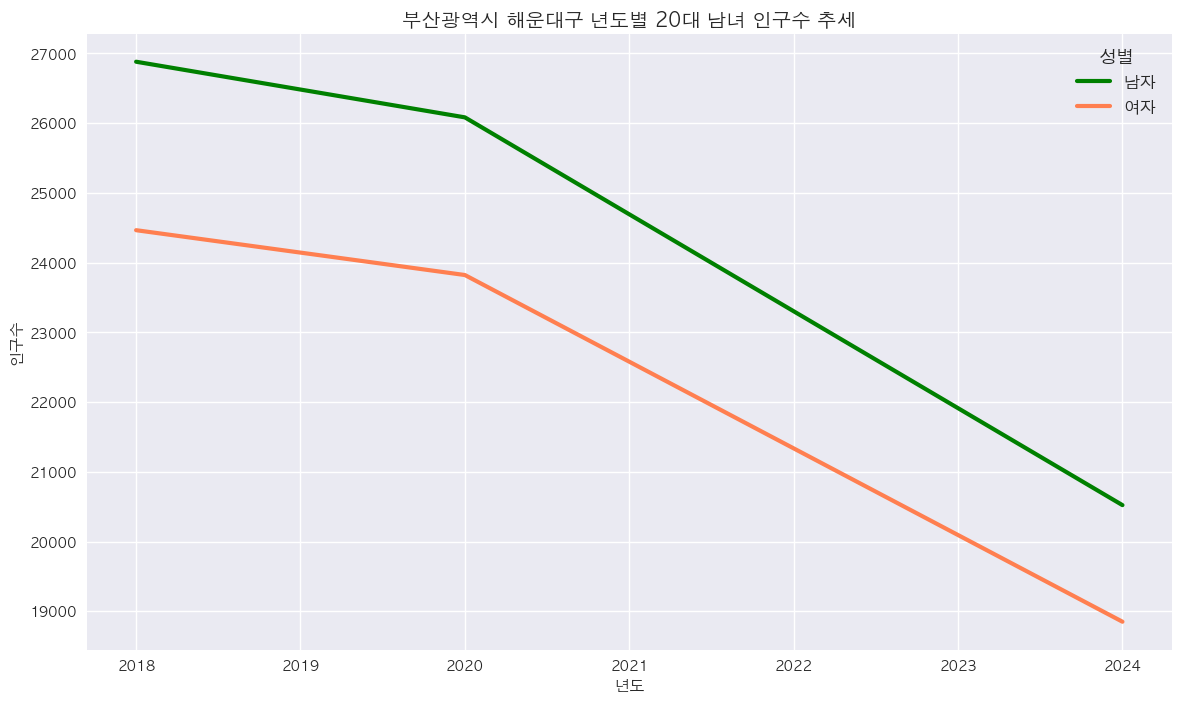

In [65]:
남자_20대_인구 = pd.concat([df_dict_남[key] for key in df_dict_남.keys() if '20대' in key], ignore_index=True)
여자_20대_인구 = pd.concat([df_dict[key] for key in df_dict.keys() if '20대' in key], ignore_index=True)

combined_df = pd.concat([남자_20대_인구, 여자_20대_인구], ignore_index=True)

# 데이터 그룹화: 년도별, 성별로 인구수 합산
grouped_df = combined_df.groupby(['년도', '성별'])['인구수'].sum().unstack().reset_index()

plt.figure(figsize=(14,8))

plt.plot(grouped_df['년도'], grouped_df['남자'], label='남자', color='green', linewidth=3)
plt.plot(grouped_df['년도'], grouped_df['여자'], label='여자', color='coral', linewidth=3)

# # 동, 성별, 년도별로 인구수 합산
# grouped_df = combined_df.groupby(['년도', '성별'])['인구수'].sum().unstack().reset_index()

# plt.figure(figsize=(10, 6))
# grouped_df.plot(x='년도', kind='line', stacked=True, ax = plt.gca()
#                 )
plt.title('부산광역시 해운대구 년도별 20대 남녀 인구수 추세', fontsize=14)
plt.xlabel('년도')
plt.ylabel('인구수')
plt.legend(title='성별', fontsize=12, title_fontsize=13, loc='upper right')

plt.show()

In [63]:
combined_df

,동,인구수,년도,연령,성별
0,반송제동,1614,2024,20대,남자
1,반여제동,3897,2024,20대,남자
2,송정동,471,2024,20대,남자
3,우제동,3881,2024,20대,남자
4,재송제동,3220,2024,20대,남자
5,좌제동,5280,2024,20대,남자
6,중제동,2160,2024,20대,남자
7,반송제동,2400,2020,20대,남자
8,반여제동,4988,2020,20대,남자
9,송정동,670,2020,20대,남자


In [51]:
df20대_남_2018 = df_dict_남['df2018_남자_20대']
df20대_남_2020 = df_dict_남['df2020_남자_20대']
df20대_남_2024 = df_dict_남['df2024_남자_20대']
df30대_남_2024 = df_dict_남['df2024_남자_30대']

df20대_여_2018 = df_dict['df2018_여자_20대']
df20대_여_2020 = df_dict['df2020_여자_20대']
df20대_여_2024 = df_dict['df2024_여자_20대']
df30대_여_2024 = df_dict['df2024_여자_30대']


In [29]:
df20대_여_2024

,동,인구수,년도,연령,성별
0,반송제동,1258,2024,20대,여자
1,반여제동,3166,2024,20대,여자
2,송정동,376,2024,20대,여자
3,우제동,3761,2024,20대,여자
4,재송제동,2786,2024,20대,여자
5,좌제동,5308,2024,20대,여자
6,중제동,2196,2024,20대,여자


In [30]:
df20대_남_2024

,동,인구수,년도,연령,성별
0,반송제동,1614,2024,20대,남자
1,반여제동,3897,2024,20대,남자
2,송정동,471,2024,20대,남자
3,우제동,3881,2024,20대,남자
4,재송제동,3220,2024,20대,남자
5,좌제동,5280,2024,20대,남자
6,중제동,2160,2024,20대,남자


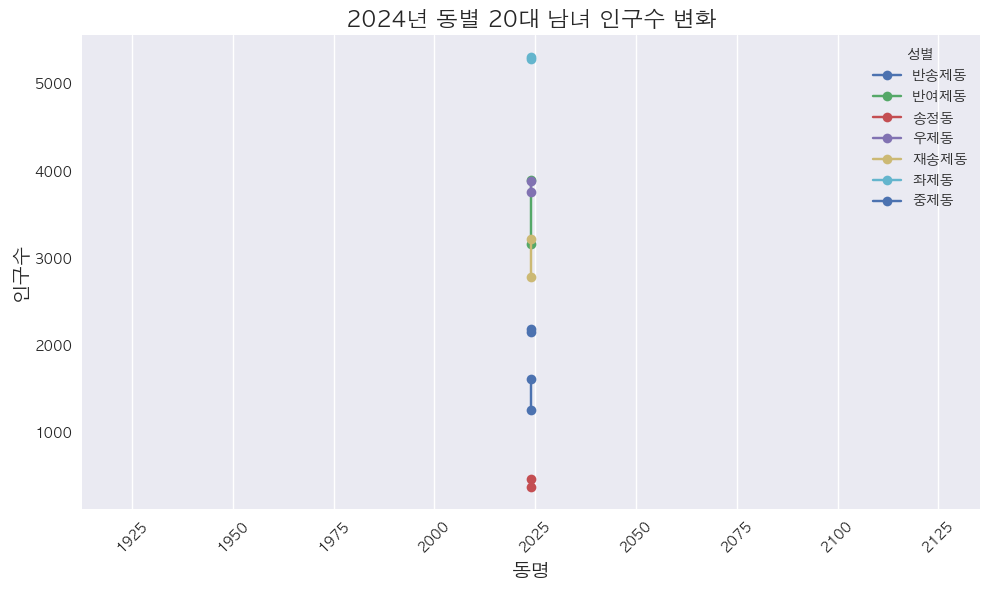

In [31]:
combined_df = pd.concat([df20대_여_2024, df20대_남_2024], ignore_index=True)
plt.figure(figsize=(10, 6))

for 동 in combined_df['동'].unique():
    동_data = combined_df[combined_df['동'] == 동]
    plt.plot(동_data['년도'], 동_data['인구수'], marker='o' ,label=동)

#  그래프 설정
plt.title('2024년 동별 20대 남녀 인구수 변화', fontsize=16)
plt.xlabel('동명', fontsize=14)
plt.ylabel('인구수', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='성별', loc='upper right')
plt.grid(axis='y')

plt.tight_layout()
plt.show()


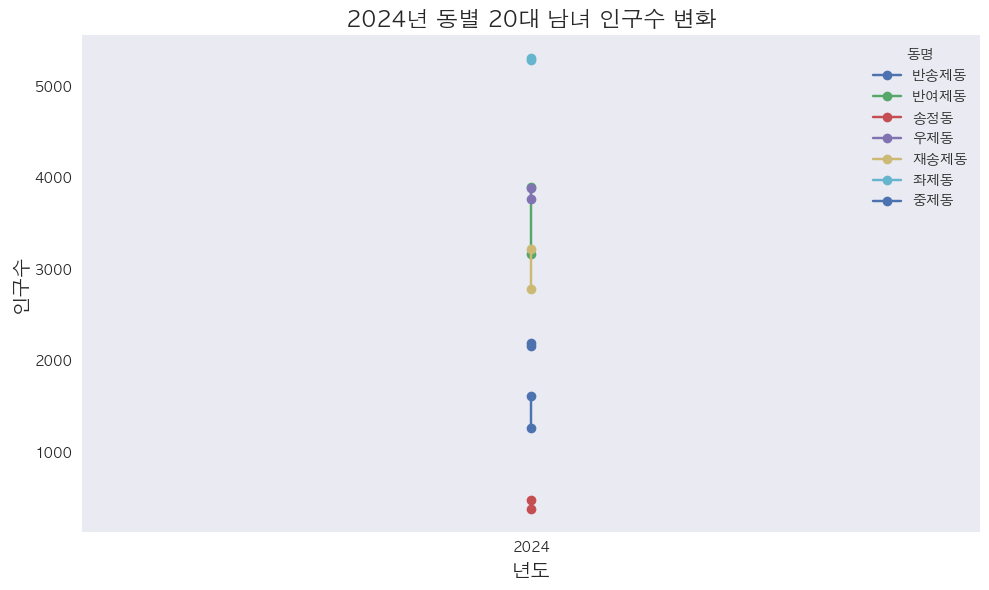

In [32]:

# DataFrame 생성
여자_df = pd.DataFrame(df20대_여_2024)
남자_df = pd.DataFrame(df20대_남_2024)

# 남자와 여자의 데이터 합치기
combined_df = pd.concat([여자_df, 남자_df], ignore_index=True)

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 동별로 꺾은선 그래프 그리기
for 동 in combined_df['동'].unique():
    동_data = combined_df[combined_df['동'] == 동]
    plt.plot(동_data['년도'], 동_data['인구수'], marker='o', label=동)

# 그래프 설정
plt.title('2024년 동별 20대 남녀 인구수 변화', fontsize=16)
plt.xlabel('년도', fontsize=14)
plt.ylabel('인구수', fontsize=14)
plt.xticks([2024])  # 현재 연도에 맞춰 x축 설정
plt.legend(title='동명')
plt.grid()

plt.tight_layout()
plt.show()

In [33]:
combined_df

,동,인구수,년도,연령,성별
0,반송제동,1258,2024,20대,여자
1,반여제동,3166,2024,20대,여자
2,송정동,376,2024,20대,여자
3,우제동,3761,2024,20대,여자
4,재송제동,2786,2024,20대,여자
5,좌제동,5308,2024,20대,여자
6,중제동,2196,2024,20대,여자
7,반송제동,1614,2024,20대,남자
8,반여제동,3897,2024,20대,남자
9,송정동,471,2024,20대,남자


In [34]:
print(combined_df.iloc[:,0:2].loc[:6])
print(combined_df.iloc[:,0:2].loc[7:13])

      동   인구수
0  반송제동  1258
1  반여제동  3166
2   송정동   376
3   우제동  3761
4  재송제동  2786
5   좌제동  5308
6   중제동  2196
       동   인구수
7   반송제동  1614
8   반여제동  3897
9    송정동   471
10   우제동  3881
11  재송제동  3220
12   좌제동  5280
13   중제동  2160


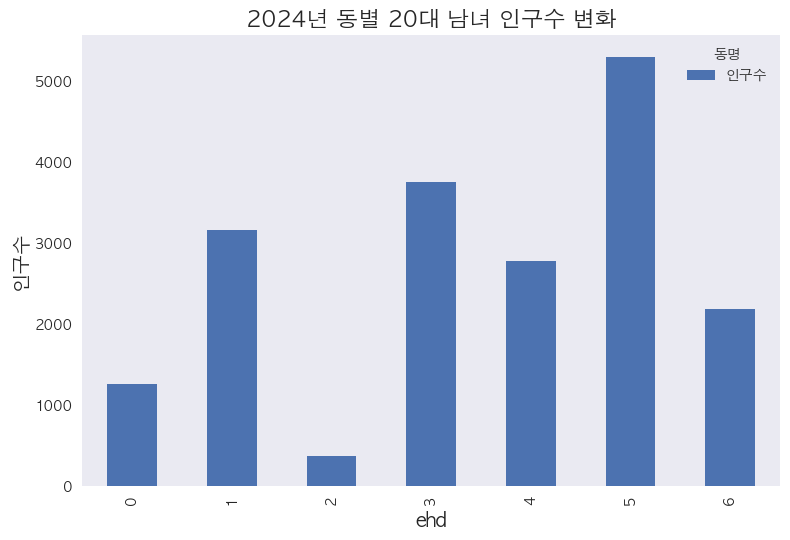

In [35]:
# 그래프 설정
combined_df.iloc[:,0:2].loc[:6].plot(kind='bar')
plt.title('2024년 동별 20대 남녀 인구수 변화', fontsize=16)
plt.xlabel('ehd', fontsize=14)
plt.ylabel('인구수', fontsize=14)
#plt.xticks([2024])  # 현재 연도에 맞춰 x축 설정
plt.legend(title='동명')
plt.grid()

plt.tight_layout()
plt.show()

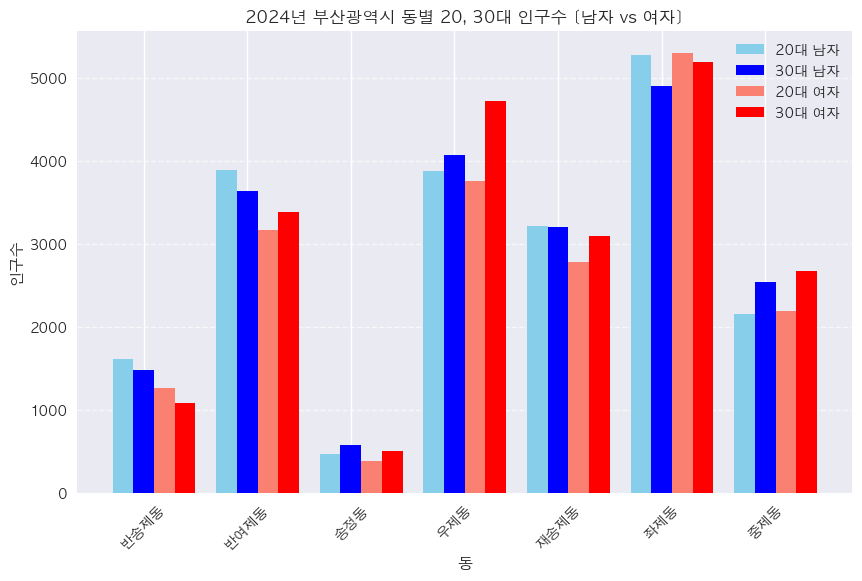

In [43]:
import numpy as np
plt.figure(figsize=(10, 6))
x = np.arange(len(df20대_남_2024['동']))

bar_width = 0.2
plt.bar(x - bar_width,    df20대_남_2024['인구수'], width=bar_width, label='20대 남자', color='skyblue')
plt.bar(x, df30대_남_2024['인구수'], width=bar_width, label='30대 남자', color='blue')
plt.bar(x + bar_width, df20대_여_2024['인구수'], width=bar_width, label='20대 여자', color='salmon')
plt.bar(x + bar_width*2,    df30대_여_2024['인구수'], width=bar_width, label='30대 여자', color='red')


plt.title('2024년 부산광역시 동별 20, 30대 인구수 [남자 vs 여자]')
plt.xlabel('동')
plt.ylabel('인구수')
plt.xticks(x, df20대_여_2024['동'], rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

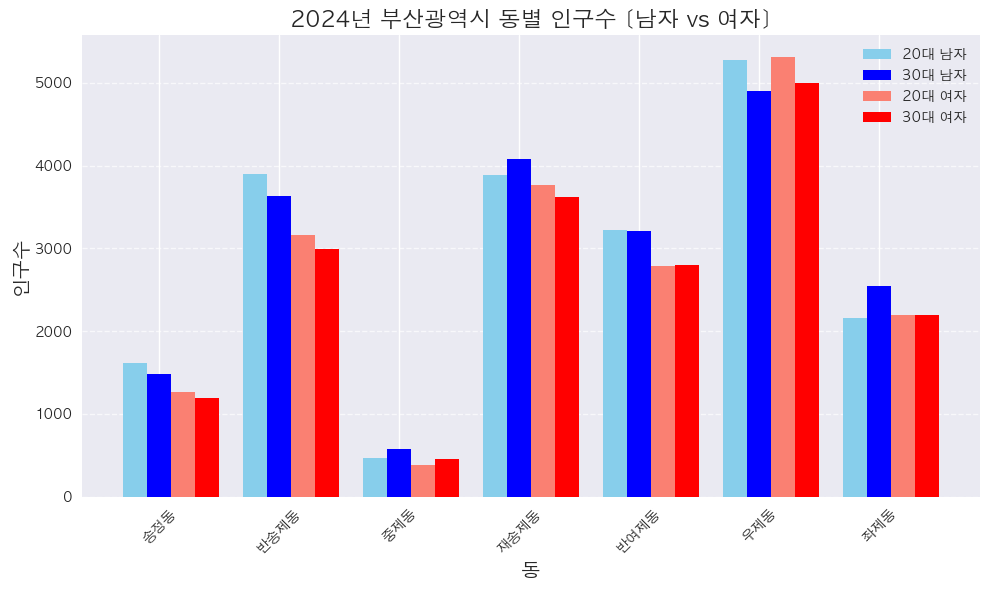

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 예시 데이터
df20대_남_2024 = pd.DataFrame({
    '동': ['반송제동', '반여제동', '송정동', '우제동', '재송제동', '좌제동', '중제동'],
    '인구수': [1614, 3897, 471, 3881, 3220, 5280, 2160]
})

df30대_남_2024 = pd.DataFrame({
    '동': ['반송제동', '반여제동', '송정동', '우제동', '재송제동', '좌제동', '중제동'],
    '인구수': [1476, 3638, 569, 4075, 3208, 4905, 2542]
})

df20대_여_2024 = pd.DataFrame({
    '동': ['반송제동', '반여제동', '송정동', '우제동', '재송제동', '좌제동', '중제동'],
    '인구수': [1258, 3166, 376, 3761, 2786, 5308, 2196]
})

df30대_여_2024 = pd.DataFrame({
    '동': ['반송제동', '반여제동', '송정동', '우제동', '재송제동', '좌제동', '중제동'],
    '인구수': [1190, 2990, 460, 3620, 2800, 5000, 2200]
})

# 모든 데이터프레임을 하나의 데이터프레임으로 병합
combined_df = pd.concat([df20대_남_2024, df30대_남_2024, df20대_여_2024, df30대_여_2024], ignore_index=True)

# 각 동별 인구수 합계 계산
sum_population = combined_df.groupby('동')['인구수'].sum().reset_index()

# 인구수 합계 기준으로 정렬
sorted_sum_population = sum_population.sort_values(by='인구수')

# X축 위치 설정
x = np.arange(len(sorted_sum_population['동']))

# 그래프 설정
plt.figure(figsize=(10, 6))

# 막대 너비
bar_width = 0.2

# 동별 성별 인구수 추가
for idx, row in sorted_sum_population.iterrows():
    동 = row['동']
    
    # 남자 인구수 가져오기
    남자_20대 = df20대_남_2024[df20대_남_2024['동'] == 동]['인구수'].values[0]
    남자_30대 = df30대_남_2024[df30대_남_2024['동'] == 동]['인구수'].values[0]
    여자_20대 = df20대_여_2024[df20대_여_2024['동'] == 동]['인구수'].values[0]
    여자_30대 = df30대_여_2024[df30대_여_2024['동'] == 동]['인구수'].values[0]
    
    # 막대 그래프 그리기
    plt.bar(x[idx] - bar_width, 남자_20대, width=bar_width, label='20대 남자' if idx == 0 else "", color='skyblue')
    plt.bar(x[idx], 남자_30대, width=bar_width, label='30대 남자' if idx == 0 else "", color='blue')
    plt.bar(x[idx] + bar_width, 여자_20대, width=bar_width, label='20대 여자' if idx == 0 else "", color='salmon')
    plt.bar(x[idx] + bar_width * 2, 여자_30대, width=bar_width, label='30대 여자' if idx == 0 else "", color='red')

# 그래프 설정
plt.title('2024년 부산광역시 동별 인구수 [남자 vs 여자]', fontsize=16)
plt.xlabel('동', fontsize=14)
plt.ylabel('인구수', fontsize=14)
plt.xticks(x, sorted_sum_population['동'], rotation=45)  # X축 레이블
plt.legend()  # 범례 추가
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


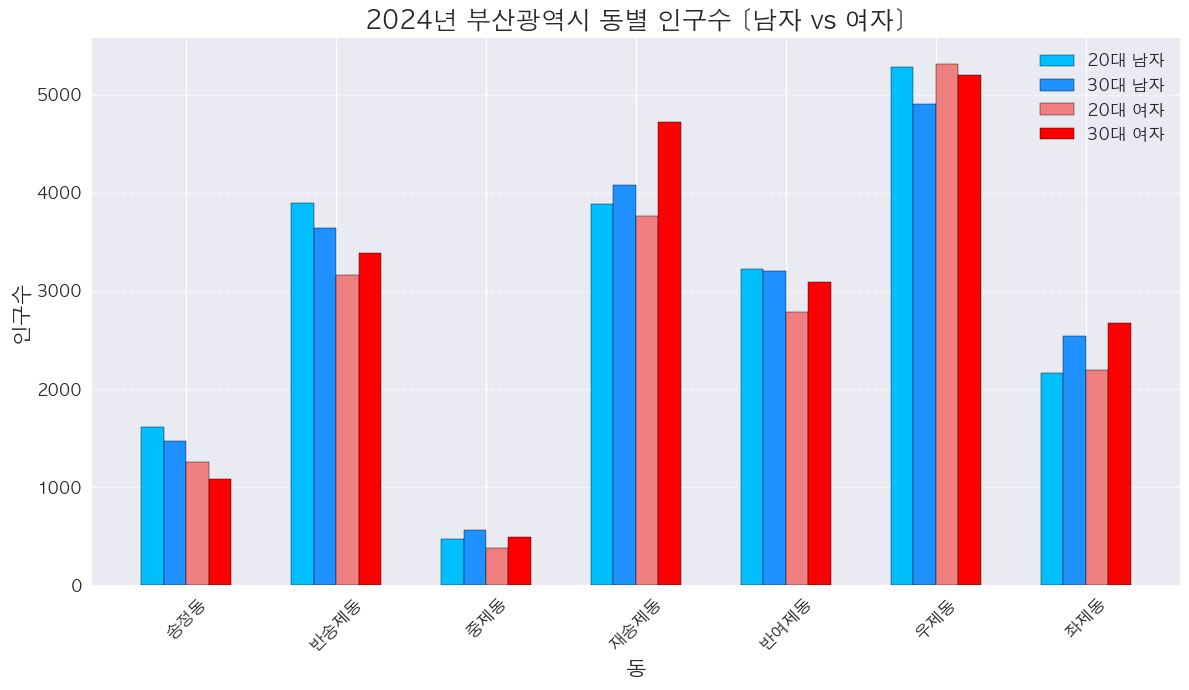

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# # 예시 데이터
# df20대_남_2024 = pd.DataFrame({
#     '동': ['반송제동', '반여제동', '송정동', '우제동', '재송제동', '좌제동', '중제동'],
#     '인구수': [1614, 3897, 471, 3881, 3220, 5280, 2160]
# })

# df30대_남_2024 = pd.DataFrame({
#     '동': ['반송제동', '반여제동', '송정동', '우제동', '재송제동', '좌제동', '중제동'],
#     '인구수': [1476, 3638, 569, 4075, 3208, 4905, 2542]
# })

# df20대_여_2024 = pd.DataFrame({
#     '동': ['반송제동', '반여제동', '송정동', '우제동', '재송제동', '좌제동', '중제동'],
#     '인구수': [1258, 3166, 376, 3761, 2786, 5308, 2196]
# })

# df30대_여_2024 = pd.DataFrame({
#     '동': ['반송제동', '반여제동', '송정동', '우제동', '재송제동', '좌제동', '중제동'],
#     '인구수': [1190, 2990, 460, 3620, 2800, 5000, 2200]
# })

# 모든 데이터프레임을 하나의 데이터프레임으로 병합
combined_df = pd.concat([df20대_남_2024, df30대_남_2024, df20대_여_2024, df30대_여_2024], ignore_index=True)

# 각 동별 인구수 합계 계산
sum_population = combined_df.groupby('동')['인구수'].sum().reset_index()

# 인구수 합계 기준으로 정렬
sorted_sum_population = sum_population.sort_values(by='인구수')

# X축 위치 설정
x = np.arange(len(sorted_sum_population['동']))

# 그래프 설정
plt.figure(figsize=(12, 7))

# 막대 너비
bar_width = 0.15

# 동별 성별 인구수 추가
for idx, row in sorted_sum_population.iterrows():
    동 = row['동']
    
    # 남자 인구수 가져오기
    남자_20대 = df20대_남_2024[df20대_남_2024['동'] == 동]['인구수'].values[0]
    남자_30대 = df30대_남_2024[df30대_남_2024['동'] == 동]['인구수'].values[0]
    여자_20대 = df20대_여_2024[df20대_여_2024['동'] == 동]['인구수'].values[0]
    여자_30대 = df30대_여_2024[df30대_여_2024['동'] == 동]['인구수'].values[0]
    
    # 막대 그래프 그리기
    plt.bar(x[idx] - bar_width * 1.5, 남자_20대, width=bar_width, label='20대 남자' if idx == 0 else "", color='deepskyblue', edgecolor='black')
    plt.bar(x[idx] - bar_width / 2, 남자_30대, width=bar_width, label='30대 남자' if idx == 0 else "", color='dodgerblue', edgecolor='black')
    plt.bar(x[idx] + bar_width / 2, 여자_20대, width=bar_width, label='20대 여자' if idx == 0 else "", color='lightcoral', edgecolor='black')
    plt.bar(x[idx] + bar_width * 1.5, 여자_30대, width=bar_width, label='30대 여자' if idx == 0 else "", color='red', edgecolor='black')

# 그래프 설정
plt.title('2024년 부산광역시 동별 인구수 [남자 vs 여자]', fontsize=18, fontweight='bold')
plt.xlabel('동', fontsize=15)
plt.ylabel('인구수', fontsize=15)
plt.xticks(x, sorted_sum_population['동'], rotation=45, fontsize=12)  # X축 레이블
plt.yticks(fontsize=12)  # Y축 레이블
plt.legend(fontsize=12, loc='upper right')  # 범례 추가
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


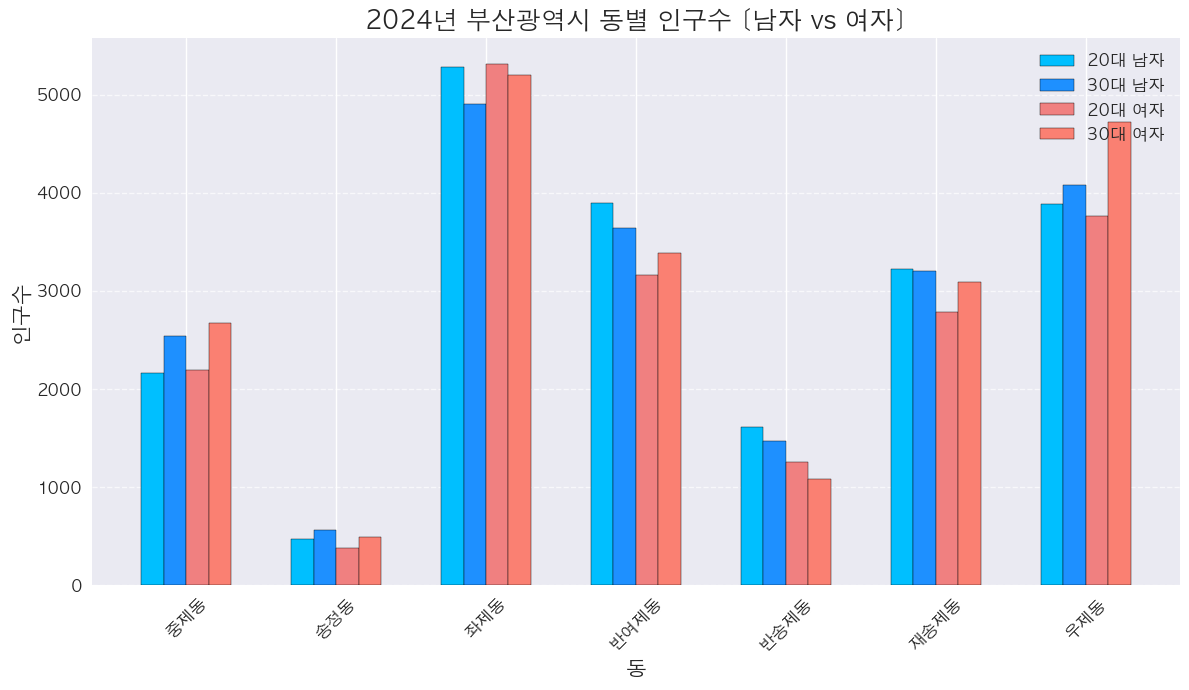

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# # 예시 데이터
# df20대_남_2024 = pd.DataFrame({
#     '동': ['반송제동', '반여제동', '송정동', '우제동', '재송제동', '좌제동', '중제동'],
#     '인구수': [1614, 3897, 471, 3881, 3220, 5280, 2160]
# })

# df30대_남_2024 = pd.DataFrame({
#     '동': ['반송제동', '반여제동', '송정동', '우제동', '재송제동', '좌제동', '중제동'],
#     '인구수': [1476, 3638, 569, 4075, 3208, 4905, 2542]
# })

# df20대_여_2024 = pd.DataFrame({
#     '동': ['반송제동', '반여제동', '송정동', '우제동', '재송제동', '좌제동', '중제동'],
#     '인구수': [1258, 3166, 376, 3761, 2786, 5308, 2196]
# })

# df30대_여_2024 = pd.DataFrame({
#     '동': ['반송제동', '반여제동', '송정동', '우제동', '재송제동', '좌제동', '중제동'],
#     '인구수': [1190, 2990, 460, 3620, 2800, 5000, 2200]
# })

# 모든 데이터프레임을 하나의 데이터프레임으로 병합
combined_df = pd.concat([df20대_남_2024, df30대_남_2024, df20대_여_2024, df30대_여_2024], ignore_index=True)

# 각 동별 인구수 합계 계산
sum_population = combined_df.groupby('동')['인구수'].sum().reset_index()

# 원하는 동의 순서
desired_order = ['중제동', '송정동', '좌제동', '반여제동', '반송제동', '재송제동', '우제동']

# 각 데이터프레임을 원하는 순서로 정렬
df20대_남_2024['동'] = pd.Categorical(df20대_남_2024['동'], categories=desired_order, ordered=True)
df30대_남_2024['동'] = pd.Categorical(df30대_남_2024['동'], categories=desired_order, ordered=True)
df20대_여_2024['동'] = pd.Categorical(df20대_여_2024['동'], categories=desired_order, ordered=True)
df30대_여_2024['동'] = pd.Categorical(df30대_여_2024['동'], categories=desired_order, ordered=True)

# 각 데이터프레임 정렬
df20대_남_2024 = df20대_남_2024.sort_values('동')
df30대_남_2024 = df30대_남_2024.sort_values('동')
df20대_여_2024 = df20대_여_2024.sort_values('동')
df30대_여_2024 = df30대_여_2024.sort_values('동')

# X축 위치 설정
x = np.arange(len(df20대_남_2024['동']))

# 그래프 설정
plt.figure(figsize=(12, 7))

# 막대 너비
bar_width = 0.15

# 동별 성별 인구수 추가
for idx in range(len(df20대_남_2024)):
    plt.bar(x[idx] - bar_width * 1.5, df20대_남_2024.iloc[idx]['인구수'], width=bar_width, label='20대 남자' if idx == 0 else "", color='deepskyblue', edgecolor='black')
    plt.bar(x[idx] - bar_width / 2, df30대_남_2024.iloc[idx]['인구수'], width=bar_width, label='30대 남자' if idx == 0 else "", color='dodgerblue', edgecolor='black')
    plt.bar(x[idx] + bar_width / 2, df20대_여_2024.iloc[idx]['인구수'], width=bar_width, label='20대 여자' if idx == 0 else "", color='lightcoral', edgecolor='black')
    plt.bar(x[idx] + bar_width * 1.5, df30대_여_2024.iloc[idx]['인구수'], width=bar_width, label='30대 여자' if idx == 0 else "", color='salmon', edgecolor='black')

# 그래프 설정
plt.title('2024년 부산광역시 동별 인구수 [남자 vs 여자]', fontsize=18, fontweight='bold')
plt.xlabel('동', fontsize=15)
plt.ylabel('인구수', fontsize=15)
plt.xticks(x, df20대_남_2024['동'], rotation=45, fontsize=12)  # X축 레이블
plt.yticks(fontsize=12)  # Y축 레이블
plt.legend(fontsize=12, loc='upper right')  # 범례 추가
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

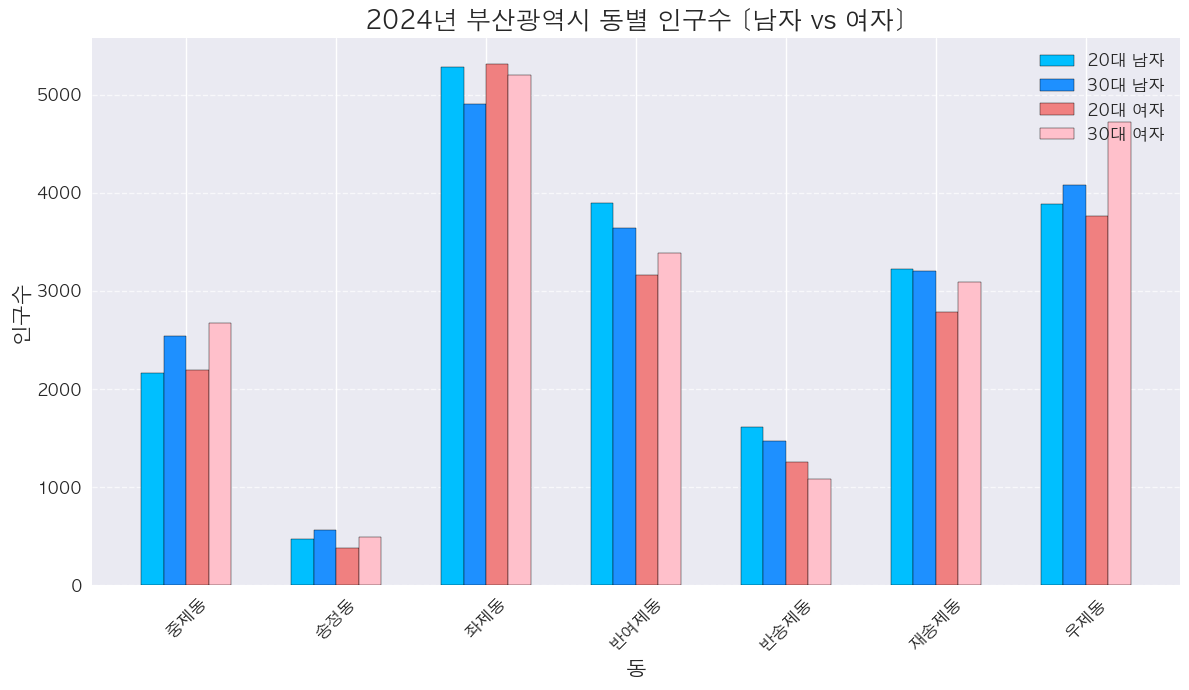

In [59]:


# 모든 데이터프레임을 하나의 데이터프레임으로 병합
combined_df = pd.concat([df20대_남_2024, df30대_남_2024, df20대_여_2024, df30대_여_2024], ignore_index=True)

# 각 동별 인구수 합계 계산
sum_population = combined_df.groupby('동')['인구수'].sum().reset_index()

# 원하는 동의 순서
desired_order = ['중제동', '송정동', '좌제동', '반여제동', '반송제동', '재송제동', '우제동']


# 각 데이터프레임을 원하는 순서로 정렬
df20대_남_2024['동'] = pd.Categorical(df20대_남_2024['동'], categories=desired_order, ordered=True)
df30대_남_2024['동'] = pd.Categorical(df30대_남_2024['동'], categories=desired_order, ordered=True)
df20대_여_2024['동'] = pd.Categorical(df20대_여_2024['동'], categories=desired_order, ordered=True)
df30대_여_2024['동'] = pd.Categorical(df30대_여_2024['동'], categories=desired_order, ordered=True)

# 각 데이터프레임 정렬
df20대_남_2024 = df20대_남_2024.sort_values('동')
df30대_남_2024 = df30대_남_2024.sort_values('동')
df20대_여_2024 = df20대_여_2024.sort_values('동')
df30대_여_2024 = df30대_여_2024.sort_values('동')

# X축 위치 설정
x = np.arange(len(df20대_남_2024['동']))

# 그래프 설정
plt.figure(figsize=(12, 7))

# 막대 너비
bar_width = 0.15

# 동별 성별 인구수 추가
for idx in range(len(df20대_남_2024)):
    plt.bar(x[idx] - bar_width * 1.5, df20대_남_2024.iloc[idx]['인구수'], width=bar_width, label='20대 남자' if idx == 0 else "", color='deepskyblue', edgecolor='black')
    plt.bar(x[idx] - bar_width / 2, df30대_남_2024.iloc[idx]['인구수'], width=bar_width, label='30대 남자' if idx == 0 else "", color='dodgerblue', edgecolor='black')
    plt.bar(x[idx] + bar_width / 2, df20대_여_2024.iloc[idx]['인구수'], width=bar_width, label='20대 여자' if idx == 0 else "", color='lightcoral', edgecolor='black')
    plt.bar(x[idx] + bar_width * 1.5, df30대_여_2024.iloc[idx]['인구수'], width=bar_width, label='30대 여자' if idx == 0 else "", color='pink', edgecolor='black')

# 그래프 설정
plt.title('2024년 부산광역시 동별 인구수 [남자 vs 여자]', fontsize=18, fontweight='bold')
plt.xlabel('동', fontsize=15)
plt.ylabel('인구수', fontsize=15)
plt.xticks(x, df20대_남_2024['동'], rotation=45, fontsize=12)  # X축 레이블
plt.yticks(fontsize=12)  # Y축 레이블
plt.legend(fontsize=12, loc='upper right')  # 범례 추가
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [76]:



연간부산 = pd.read_csv('./Data/201812_202312_주민등록인구및세대현황_연간 (1).csv', encoding='euc-kr')
연간부산.iloc[0,[1,3,4,5, 7,8,9, 11,12,13, 15,16,17, 19,20,21, 23,24]]
data = {
    '년도': [2018, 2019, 2020, 2021, 2022, 2023],
    '총인구수': [409347, 406102, 402169, 396438, 386785, 380448],
    '남자 인구수': [197871, 195960, 193618, 190624, 185514, 182289],
    '여자 인구수': [211476, 210142, 208551, 205814, 201271, 198159]
}

# 데이터프레임 생성
연간부산df = pd.DataFrame(data)

연간부산df


,년도,총인구수,남자 인구수,여자 인구수
0,2018,409347,197871,211476
1,2019,406102,195960,210142
2,2020,402169,193618,208551
3,2021,396438,190624,205814
4,2022,386785,185514,201271
5,2023,380448,182289,198159


In [79]:
연간부산.iloc[0,[1,3,4,5, 7,8,9, 11,12,13, 15,16,17, 19,20,21, 23,24]]

2018년_총인구수      409,347
2018년_남자 인구수    197,871
2018년_여자 인구수    211,476
2019년_총인구수      406,102
2019년_남자 인구수    195,960
2019년_여자 인구수    210,142
2020년_총인구수      402,169
2020년_남자 인구수    193,618
2020년_여자 인구수    208,551
2021년_총인구수      396,438
2021년_남자 인구수    190,624
2021년_여자 인구수    205,814
2022년_총인구수      386,785
2022년_남자 인구수    185,514
2022년_여자 인구수    201,271
2023년_총인구수      380,448
2023년_남자 인구수    182,289
2023년_여자 인구수    198,159
Name: 0, dtype: object

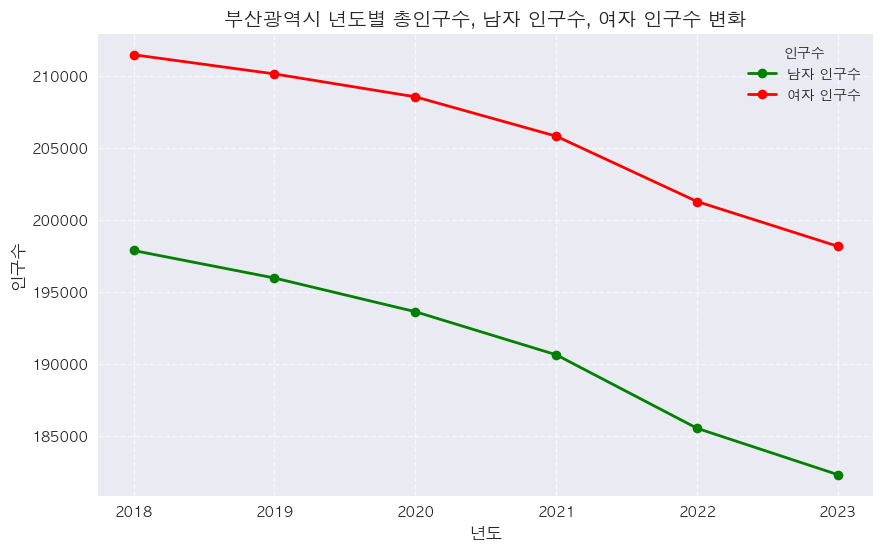

In [78]:
import matplotlib.pyplot as plt

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 총인구수, 남자 인구수, 여자 인구수 꺾은선 그래프
# plt.plot(연간부산df['년도'], 연간부산df['총인구수'], label='총인구수', marker='o', color='black', linewidth=2)
plt.plot(연간부산df['년도'], 연간부산df['남자 인구수'], label='남자 인구수', marker='o', color='green', linewidth=2)
plt.plot(연간부산df['년도'], 연간부산df['여자 인구수'], label='여자 인구수', marker='o', color='red', linewidth=2)

# 그래프 제목 및 라벨 설정
plt.title('부산광역시 년도별 총인구수, 남자 인구수, 여자 인구수 변화', fontsize=14)
plt.xlabel('년도', fontsize=12)
plt.ylabel('인구수', fontsize=12)

# 범례 추가
plt.legend(title='인구수', fontsize=10)

# 그리드 추가
plt.grid(True, linestyle='--', alpha=0.7)

# 그래프 보여주기
plt.show()


In [112]:
부산청년 =  pd.read_csv('./Data/202401_202409_주민등록인구기타현황(지역별 아동,청소년,청년 인구현황)_ChYouthDetail.csv', encoding='euc-kr')
부산청년들 = 부산청년.T.iloc[:, 0:1].reset_index()

부산청년들 = 부산청년들.drop(index=0)


,index,0
1,2024년01월_전체,"379,702"
2,2024년01월_남자,"181,894"
3,2024년01월_여자,"197,808"
4,2024년01월_아동전체,"51,553"
5,2024년01월_아동남자,"26,533"
...,...,...
104,2024년09월_청소년남자,"29,382"
105,2024년09월_청소년여자,"27,116"
106,2024년09월_청년전체,"62,751"
107,2024년09월_청년남자,"32,385"


In [117]:
부산청년들= 부산청년들[부산청년들['index'].str.contains('청년')]
부산청년들


,index,0
10,2024년01월_청년전체,"64,462"
11,2024년01월_청년남자,"33,265"
12,2024년01월_청년여자,"31,197"
22,2024년02월_청년전체,"63,827"
23,2024년02월_청년남자,"32,961"
24,2024년02월_청년여자,"30,866"
34,2024년03월_청년전체,"63,509"
35,2024년03월_청년남자,"32,821"
36,2024년03월_청년여자,"30,688"
46,2024년04월_청년전체,"63,278"


In [119]:
# 월 컬럼 생성
부산청년들['월'] = 부산청년들['index'].str.extract(r'2024년(\d{2})월')[0].astype(str).str.zfill(2)



In [130]:

구분 = ['전체', '남자', '여자'] * 9

부산청년들['구분'] = 구분
부산청년들

,index,0,월,구분
10,2024년01월_청년전체,"64,462",01,전체
11,2024년01월_청년남자,"33,265",01,남자
12,2024년01월_청년여자,"31,197",01,여자
22,2024년02월_청년전체,"63,827",02,전체
23,2024년02월_청년남자,"32,961",02,남자
24,2024년02월_청년여자,"30,866",02,여자
34,2024년03월_청년전체,"63,509",03,전체
35,2024년03월_청년남자,"32,821",03,남자
36,2024년03월_청년여자,"30,688",03,여자
46,2024년04월_청년전체,"63,278",04,전체


In [137]:
# 특정 컬럼 이름 변경
부산청년들 = 부산청년들.rename(columns={'index': '행정구역'}, inplace=True)
부산청년들 = 부산청년들.rename(columns={'0': '인구수'}, inplace=True)
부산청년들


AttributeError: 'NoneType' object has no attribute 'rename'

In [135]:

# '월'과 '구분' 열을 추가
부산청년들['월'] = 부산청년들['index'].str[:7]  # '2024년01월' 부분
부산청년들['구분'] = 부산청년들['index'].str.split('_').str[1]  # '청년전체', '청년남자', '청년여자' 중 구분

# 데이터 피벗팅
pivot_df = 부산청년들.pivot(index='월', columns='구분', values='0')

# 데이터 확인
print(pivot_df)

# 그래프 그리기
plt.figure(figsize=(10, 6))
pivot_df.plot(kind='line', marker='o')
plt.title('2024년 부산 해운대구 청년 인구수 월별 추세')
plt.xlabel('월')
plt.ylabel('인구수')
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='구분')
plt.tight_layout()  # 자동으로 레이아웃 조정
plt.show()

KeyError: '0'